In [1]:
import tensorflow as tf
keras = tf.keras
import warnings
warnings.filterwarnings("ignore")
import gensim, re
import numpy as np
import pandas as pd
import openpyxl
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from tensorflow.keras.models import load_model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding, Bidirectional, Dropout

In [2]:
main_data = pd.read_excel( r"C:\Users\Dhrubo\1_Thesis\data_v2\suicide_data.xlsx", sheet_name="Sheet1" )
print(main_data.columns.ravel())
posts = main_data['text'].tolist()
labels = main_data['label'].tolist()


['text' 'label']


In [3]:
from nltk.tokenize import word_tokenize

def clean_text(data):
    all_data = list()
    final_data = list()
    stopwords_bn = ["অতএব","অথচ","অথবা","অনুযায়ী","অনেক","অনেকে","অনেকেই","অন্তত","অন্য","অবধি","অবশ্য","অর্থাত","আই","আগামী","আগে","আগেই","আছে","আজ","আদ্যভাগে","আপনার","আপনি","আবার","আমরা","আমাকে","আমাদের","আমার","আমি","আর","আরও","ই","ইত্যাদি","ইহা","উচিত","উত্তর","উনি","উপর","উপরে","এ","এঁদের","এঁরা","এই","একই","একটি","একবার","একে","এক্","এখন","এখনও","এখানে","এখানেই","এটা","এটাই","এটি","এত","এতটাই","এতে","এদের","এব","এবং","এবার","এমন","এমনকী","এমনি","এর","এরা","এল","এস","এসে","ঐ","ও","ওঁদের","ওঁর","ওঁরা","ওই","ওকে","ওখানে","ওদের","ওর","ওরা","কখনও","কত","কবে","কমনে","কয়েক","কয়েকটি","করছে","করছেন","করতে","করবে","করবেন","করলে","করলেন","করা","করাই","করায়","করার","করি","করিতে","করিয়া","করিয়ে","করে","করেই","করেছিলেন","করেছে","করেছেন","করেন","কাউকে","কাছ","কাছে","কাজ","কাজে","কারও","কারণ","কি","কিংবা","কিছু","কিছুই","কিন্তু","কী","কে","কেউ","কেউই","কেখা","কেন","কোটি","কোন","কোনও","কোনো","ক্ষেত্রে","কয়েক","খুব","গিয়ে","গিয়েছে","গিয়ে","গুলি","গেছে","গেল","গেলে","গোটা","চলে","চান","চায়","চার","চালু","চেয়ে","চেষ্টা","ছাড়া","ছাড়াও","ছিল","ছিলেন","জন","জনকে","জনের","জন্য","জন্যওজে","জানতে","জানা","জানানো","জানায়","জানিয়ে","জানিয়েছে","জে","জ্নজন","টি","ঠিক","তখন","তত","তথা","তবু","তবে","তা","তাঁকে","তাঁদের","তাঁর","তাঁরা","তাঁাহারা","তাই","তাও","তাকে","তাতে","তাদের","তার","তারপর","তারা","তারৈ","তাহলে","তাহা","তাহাতে","তাহার","তিনঐ","তিনি","তিনিও","তুমি","তুলে","তেমন","তো","তোমার","থাকবে","থাকবেন","থাকা","থাকায়","থাকে","থাকেন","থেকে","থেকেই","থেকেও","দিকে","দিতে","দিন","দিয়ে","দিয়েছে","দিয়েছেন","দিলেন","দু","দুই","দুটি","দুটো","দেওয়া","দেওয়ার","দেওয়া","দেখতে","দেখা","দেখে","দেন","দেয়","দ্বারা","ধরা","ধরে","ধামার","নতুন","নাকি","নাগাদ","নানা","নিজে","নিজেই","নিজেদের","নিজের","নিতে","নিয়ে","নিয়ে","নেওয়া","নেওয়ার","নেওয়া","নয়","পক্ষে","পর","পরে","পরেই","পরেও","পর্যন্ত","পাওয়া","পাচ","পারি","পারে","পারেন","পি","পেয়ে","পেয়্র্","প্রতি","প্রথম","প্রভৃতি","প্রযন্ত","প্রাথমিক","প্রায়","প্রায়","ফলে","ফিরে","ফের","বক্তব্য","বদলে","বন","বরং","বলতে","বলল","বললেন","বলা","বলে","বলেছেন","বলেন","বসে","বহু","বা","বাদে","বার","বি","বিনা","বিভিন্ন","বিশেষ","বিষয়টি","বেশ","বেশি","ব্যবহার","ব্যাপারে","ভাবে","ভাবেই","মতো","মতোই","মধ্যভাগে","মধ্যে","মধ্যেই","মধ্যেও","মনে","মাত্র","মাধ্যমে","মোট","মোটেই","যখন","যত","যতটা","যথেষ্ট","যদি","যদিও","যা","যাঁর","যাঁরা","যাওয়া","যাওয়ার","যাওয়া","যাকে","যাচ্ছে","যাতে","যাদের","যান","যাবে","যায়","যার","যারা","যিনি","যে","যেখানে","যেতে","যেন","যেমন","র","রকম","রয়েছে","রাখা","রেখে","লক্ষ","শুধু","শুরু","সঙ্গে","সঙ্গেও","সব","সবার","সমস্ত","সম্প্রতি","সহ","সহিত","সাধারণ","সামনে","সি","সুতরাং","সে","সেই","সেখান","সেখানে","সেটা","সেটাই","সেটাও","সেটি","স্পষ্ট","স্বয়ং","হইতে","হইবে","হইয়া","হওয়া","হওয়ায়","হওয়ার","হচ্ছে","হত","হতে","হতেই","হন","হবে","হবেন","হয়","হয়তো","হয়নি","হয়ে","হয়েই","হয়েছিল","হয়েছে","হয়েছেন","হল","হলে","হলেই","হলেও","হলো","হাজার","হিসাবে","হৈলে","হোক","হয়"]
    lines = [re.sub(r'[^\u0980-\u09FF]+',' ',sentence) for sentence in data]
    lines = [re.sub(r'[\u09E6-\u09EF]+','',sentence) for sentence in data]
    lines = [re.sub(r'[0-9a-zA-Z]+','',sentence) for sentence in data]
    for text in lines: 
        pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
        text = pattern.sub('', text)
        
        emoji = re.compile("["
                           u"\U0001F600-\U0001FFFF"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
        text = emoji.sub(r'', text)
        
        text = re.sub(r"[।“,”'’‘.\"!@#$%^&*(){}?/;`~:<>+=-]", "", text)
        text = re.sub(r"\s+$", "", text)
        text = re.sub(r"^\s", "", text)
        tokens = word_tokenize(text)
        words = [w for w in tokens if not w in stopwords_bn]
        all_data.append(words) 
    
#     removing numbers and empty words
    for line in all_data:
            line = [re.sub(r'[\u09E6-\u09EF]+','',word) for word in line]
            line = [w for w in line if not w == '']
            final_data.append(line)
    
    return final_data

In [4]:
cleaned_data = clean_text(posts)

In [5]:
features = 100
tokenizer = Tokenizer(num_words=features)

In [6]:

tokenizer.fit_on_texts(cleaned_data)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(cleaned_data)

maxlen=10
padType='post'

X = pad_sequences(sequences, maxlen=maxlen, padding="post", truncating="post")
y = np.asarray(pd.get_dummies(labels))

In [7]:
len(X), len(y)

(1402, 1402)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True)

In [9]:


def get_model(num_of_layer):
    model = Sequential()
    model.add(Embedding(4000, features, input_length = X.shape[1]))
    
    for i in range(num_of_layer):
        if i>0:
            model.add(LSTM(features, return_sequences=True))
        
    model.add(LSTM(features, return_sequences=False))
    model.add(Dense(10, activation="relu"))
    model.add(Dense(y.shape[1], activation="softmax"))

    opt = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model;

In [10]:
def run_model(model, batch, epochs):
    history = model.fit(X_train, y_train, batch, epochs, validation_data=(X_test, y_test), verbose=1)
    return history

In [11]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()


Epoch 1/10
36/36 [==============================] - 5s 48ms/step - loss: 0.6925 - accuracy: 0.5031 - val_loss: 0.6905 - val_accuracy: 0.5516
Epoch 2/10
36/36 [==============================] - 1s 20ms/step - loss: 0.6907 - accuracy: 0.5147 - val_loss: 0.6875 - val_accuracy: 0.5552
Epoch 3/10
36/36 [==============================] - 1s 20ms/step - loss: 0.6879 - accuracy: 0.5317 - val_loss: 0.6829 - val_accuracy: 0.5801
Epoch 4/10
36/36 [==============================] - 1s 20ms/step - loss: 0.6801 - accuracy: 0.5584 - val_loss: 0.6690 - val_accuracy: 0.6335
Epoch 5/10
36/36 [==============================] - 1s 24ms/step - loss: 0.6547 - accuracy: 0.6423 - val_loss: 0.6260 - val_accuracy: 0.7544
Epoch 6/10
36/36 [==============================] - 1s 22ms/step - loss: 0.5773 - accuracy: 0.7913 - val_loss: 0.5048 - val_accuracy: 0.8185
Epoch 7/10
36/36 [==============================] - 1s 23ms/step - loss: 0.4268 - accuracy: 0.8698 - val_loss: 0.3572 - val_accuracy: 0.8683
Epoch 8/10
36

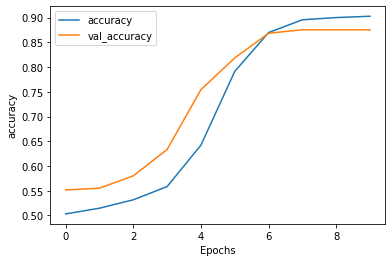

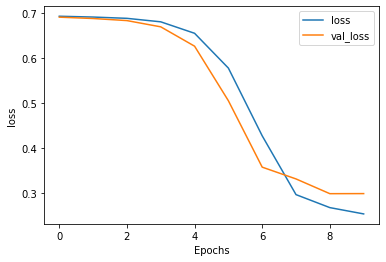

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       148
           1       0.90      0.83      0.86       133

    accuracy                           0.88       281
   macro avg       0.88      0.87      0.87       281
weighted avg       0.88      0.88      0.87       281

Epoch 1/10
36/36 [==============================] - 12s 101ms/step - loss: 0.6915 - accuracy: 0.5201 - val_loss: 0.6866 - val_accuracy: 0.5623
Epoch 2/10
36/36 [==============================] - 2s 42ms/step - loss: 0.6837 - accuracy: 0.5379 - val_loss: 0.6710 - val_accuracy: 0.5907
Epoch 3/10
36/36 [==============================] - 1s 41ms/step - loss: 0.6560 - accuracy: 0.6280 - val_loss: 0.6202 - val_accuracy: 0.7367
Epoch 4/10
36/36 [==============================] - 1s 39ms/step - loss: 0.5733 - accuracy: 0.7966 - val_loss: 0.4948 - val_accuracy: 0.8577
Epoch 5/10
36/36 [==============================] - 1s 39ms/step - loss: 0.4095 - accuracy: 0.8822 - val_lo

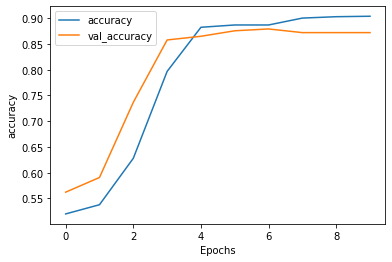

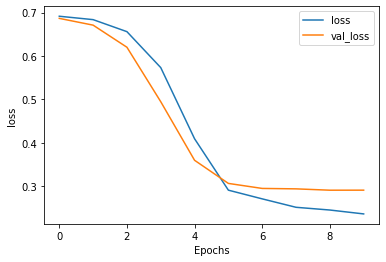

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       148
           1       0.89      0.83      0.86       133

    accuracy                           0.87       281
   macro avg       0.87      0.87      0.87       281
weighted avg       0.87      0.87      0.87       281

Epoch 1/10
36/36 [==============================] - 19s 148ms/step - loss: 0.6929 - accuracy: 0.5049 - val_loss: 0.6927 - val_accuracy: 0.4733
Epoch 2/10
36/36 [==============================] - 2s 67ms/step - loss: 0.6897 - accuracy: 0.5745 - val_loss: 0.6831 - val_accuracy: 0.6548
Epoch 3/10
36/36 [==============================] - 2s 66ms/step - loss: 0.6373 - accuracy: 0.7716 - val_loss: 0.5330 - val_accuracy: 0.7865
Epoch 4/10
36/36 [==============================] - 2s 61ms/step - loss: 0.3718 - accuracy: 0.8582 - val_loss: 0.3460 - val_accuracy: 0.8719
Epoch 5/10
36/36 [==============================] - 2s 64ms/step - loss: 0.2893 - accuracy: 0.8930 - val_lo

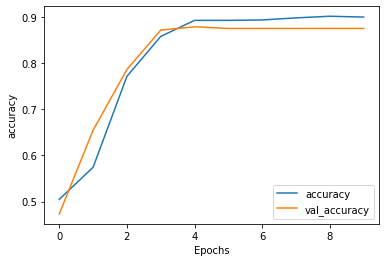

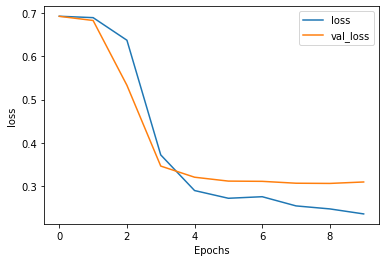

              precision    recall  f1-score   support

           0       0.86      0.91      0.89       148
           1       0.90      0.83      0.86       133

    accuracy                           0.88       281
   macro avg       0.88      0.87      0.87       281
weighted avg       0.88      0.88      0.88       281

Epoch 1/20
36/36 [==============================] - 6s 58ms/step - loss: 0.6915 - accuracy: 0.5584 - val_loss: 0.6892 - val_accuracy: 0.6228
Epoch 2/20
36/36 [==============================] - 1s 28ms/step - loss: 0.6871 - accuracy: 0.6146 - val_loss: 0.6846 - val_accuracy: 0.6940
Epoch 3/20
36/36 [==============================] - 1s 24ms/step - loss: 0.6792 - accuracy: 0.7288 - val_loss: 0.6737 - val_accuracy: 0.7331
Epoch 4/20
36/36 [==============================] - 1s 22ms/step - loss: 0.6593 - accuracy: 0.7654 - val_loss: 0.6432 - val_accuracy: 0.7794
Epoch 5/20
36/36 [==============================] - 1s 22ms/step - loss: 0.5945 - accuracy: 0.8198 - val_loss

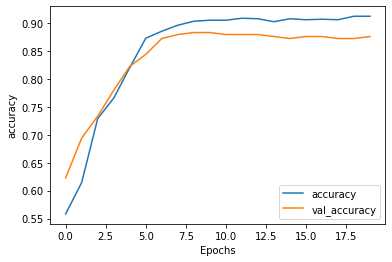

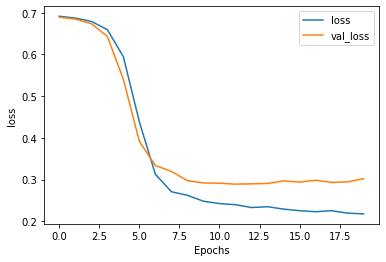

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       148
           1       0.90      0.83      0.86       133

    accuracy                           0.88       281
   macro avg       0.88      0.87      0.87       281
weighted avg       0.88      0.88      0.87       281

Epoch 1/20
36/36 [==============================] - 11s 89ms/step - loss: 0.6924 - accuracy: 0.5754 - val_loss: 0.6911 - val_accuracy: 0.6477
Epoch 2/20
36/36 [==============================] - 1s 38ms/step - loss: 0.6874 - accuracy: 0.7029 - val_loss: 0.6825 - val_accuracy: 0.6655
Epoch 3/20
36/36 [==============================] - 1s 41ms/step - loss: 0.6651 - accuracy: 0.6548 - val_loss: 0.6370 - val_accuracy: 0.6548
Epoch 4/20
36/36 [==============================] - 1s 40ms/step - loss: 0.5464 - accuracy: 0.7806 - val_loss: 0.4779 - val_accuracy: 0.8399
Epoch 5/20
36/36 [==============================] - 1s 41ms/step - loss: 0.3963 - accuracy: 0.8769 - val_los

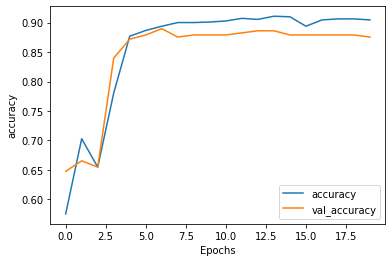

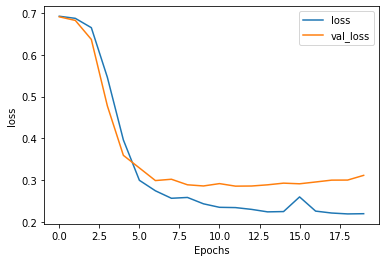

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       148
           1       0.90      0.83      0.86       133

    accuracy                           0.88       281
   macro avg       0.88      0.87      0.87       281
weighted avg       0.88      0.88      0.87       281

Epoch 1/20
36/36 [==============================] - 19s 170ms/step - loss: 0.6923 - accuracy: 0.5914 - val_loss: 0.6897 - val_accuracy: 0.6299
Epoch 2/20
36/36 [==============================] - 3s 86ms/step - loss: 0.6797 - accuracy: 0.5968 - val_loss: 0.6538 - val_accuracy: 0.7295
Epoch 3/20
36/36 [==============================] - 3s 92ms/step - loss: 0.5915 - accuracy: 0.7645 - val_loss: 0.4947 - val_accuracy: 0.8256
Epoch 4/20
36/36 [==============================] - 3s 81ms/step - loss: 0.3741 - accuracy: 0.8751 - val_loss: 0.3732 - val_accuracy: 0.7722
Epoch 5/20
36/36 [==============================] - 3s 81ms/step - loss: 0.2780 - accuracy: 0.8769 - val_lo

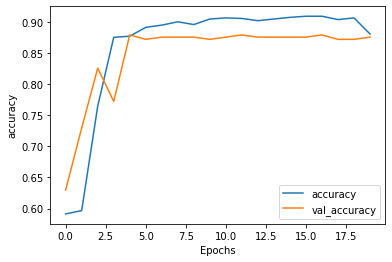

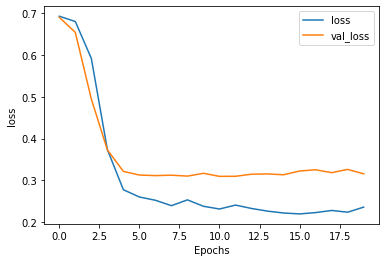

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       148
           1       0.94      0.79      0.86       133

    accuracy                           0.88       281
   macro avg       0.89      0.87      0.87       281
weighted avg       0.88      0.88      0.87       281

Epoch 1/30
36/36 [==============================] - 4s 44ms/step - loss: 0.6925 - accuracy: 0.5120 - val_loss: 0.6894 - val_accuracy: 0.5694
Epoch 2/30
36/36 [==============================] - 1s 23ms/step - loss: 0.6887 - accuracy: 0.5656 - val_loss: 0.6838 - val_accuracy: 0.6014
Epoch 3/30
36/36 [==============================] - 1s 24ms/step - loss: 0.6805 - accuracy: 0.6021 - val_loss: 0.6718 - val_accuracy: 0.6868
Epoch 4/30
36/36 [==============================] - 1s 26ms/step - loss: 0.6574 - accuracy: 0.7297 - val_loss: 0.6324 - val_accuracy: 0.8007
Epoch 5/30
36/36 [==============================] - 1s 25ms/step - loss: 0.5704 - accuracy: 0.8118 - val_loss

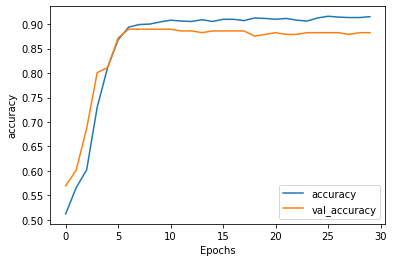

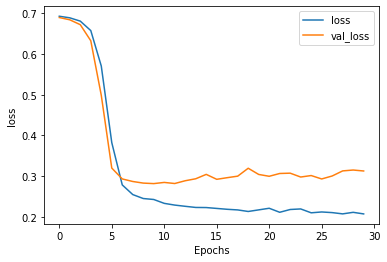

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       148
           1       0.91      0.83      0.87       133

    accuracy                           0.88       281
   macro avg       0.89      0.88      0.88       281
weighted avg       0.88      0.88      0.88       281

Epoch 1/30
36/36 [==============================] - 12s 102ms/step - loss: 0.6925 - accuracy: 0.5192 - val_loss: 0.6909 - val_accuracy: 0.5836
Epoch 2/30
36/36 [==============================] - 2s 44ms/step - loss: 0.6896 - accuracy: 0.6191 - val_loss: 0.6842 - val_accuracy: 0.6157
Epoch 3/30
36/36 [==============================] - 2s 42ms/step - loss: 0.6690 - accuracy: 0.6574 - val_loss: 0.6357 - val_accuracy: 0.7011
Epoch 4/30
36/36 [==============================] - 2s 43ms/step - loss: 0.5767 - accuracy: 0.7484 - val_loss: 0.4621 - val_accuracy: 0.8292
Epoch 5/30
36/36 [==============================] - 2s 42ms/step - loss: 0.3587 - accuracy: 0.8760 - val_lo

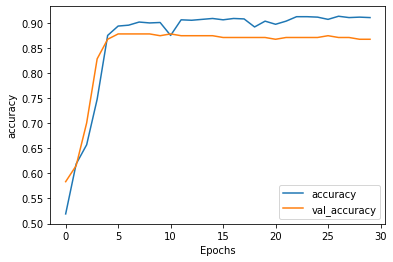

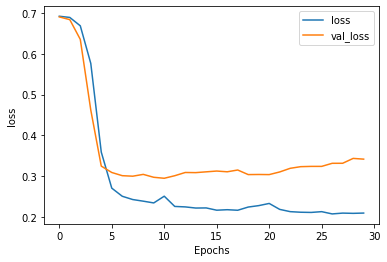

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       148
           1       0.88      0.84      0.86       133

    accuracy                           0.87       281
   macro avg       0.87      0.87      0.87       281
weighted avg       0.87      0.87      0.87       281

Epoch 1/30
36/36 [==============================] - 18s 159ms/step - loss: 0.6930 - accuracy: 0.5183 - val_loss: 0.6926 - val_accuracy: 0.4733
Epoch 2/30
36/36 [==============================] - 3s 80ms/step - loss: 0.6871 - accuracy: 0.5495 - val_loss: 0.6768 - val_accuracy: 0.5730
Epoch 3/30
36/36 [==============================] - 3s 80ms/step - loss: 0.5925 - accuracy: 0.6111 - val_loss: 0.5286 - val_accuracy: 0.7865
Epoch 4/30
36/36 [==============================] - 3s 85ms/step - loss: 0.4219 - accuracy: 0.8831 - val_loss: 0.3763 - val_accuracy: 0.8754
Epoch 5/30
36/36 [==============================] - 3s 80ms/step - loss: 0.2912 - accuracy: 0.8965 - val_lo

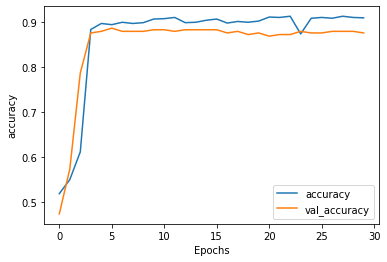

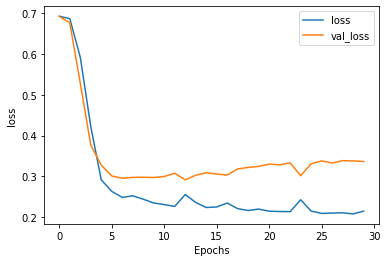

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       148
           1       0.92      0.81      0.86       133

    accuracy                           0.88       281
   macro avg       0.88      0.87      0.87       281
weighted avg       0.88      0.88      0.87       281



In [12]:
arr_batch = [32]
arr_epochs = [10,20,30]
algo_layers = [1,3,5]
output = {}
idx = 0
for batch in arr_batch:
    for epoch in arr_epochs:
        for layer in algo_layers:
            model = get_model(layer)
            history = run_model(model, batch, epoch)
            ev = model.evaluate(X_test, y_test)
            
            plot_graphs(history, "accuracy")
            plot_graphs(history, "loss")

            y_pred=model.predict(X_test) 
            y_pred=np.argmax(y_pred, axis=1)
            formated_y_test=np.argmax(y_test, axis=1)
            cm = classification_report(formated_y_test, y_pred)
            print(cm)
            
            output[idx] = {'batch':batch, 'epoch':epoch, 'num_of_layer':layer, 'acc':ev, 'cm':cm}
            idx = idx+1;

In [13]:
output

{0: {'batch': 32,
  'epoch': 10,
  'num_of_layer': 1,
  'acc': [0.29843825101852417, 0.8754448294639587],
  'cm': '              precision    recall  f1-score   support\n\n           0       0.86      0.92      0.89       148\n           1       0.90      0.83      0.86       133\n\n    accuracy                           0.88       281\n   macro avg       0.88      0.87      0.87       281\nweighted avg       0.88      0.88      0.87       281\n'},
 1: {'batch': 32,
  'epoch': 10,
  'num_of_layer': 3,
  'acc': [0.29120802879333496, 0.871886134147644],
  'cm': '              precision    recall  f1-score   support\n\n           0       0.85      0.91      0.88       148\n           1       0.89      0.83      0.86       133\n\n    accuracy                           0.87       281\n   macro avg       0.87      0.87      0.87       281\nweighted avg       0.87      0.87      0.87       281\n'},
 2: {'batch': 32,
  'epoch': 10,
  'num_of_layer': 5,
  'acc': [0.30912670493125916, 0.87544482

In [14]:
import json
json_object = json.dumps(output, indent = 4)
with open('lstm_dense.json', 'a') as fp:
    fp.write(json_object)